In [155]:
!conda install -y pandas
!conda install -y seaborn
!conda install -y scikit-learn
!conda install -y statsmodels
!conda install -y seaborn
import pandas as pd
from sklearn import linear_model
import statsmodels.api
import seaborn as sns 
import glob
import matplotlib.pyplot as plt


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [162]:

filenames = glob.glob('data_2019/*.csv')
li = []
for filename in filenames: 
    df = pd.read_csv(filename, index_col=None, header=0)
    filename = filename.replace('data_2019/', "")
    filename = filename.replace('.csv', '')
    df['Day'] = filename
    df.rename(columns= {'Day' : 'Team Name'}, inplace= True)
    li.append(df)
team_stats_init = pd.concat(li, axis= 0, ignore_index=True)

team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('opp',case = False)],axis = 1, inplace = True)


team_stats_init = team_stats_init.rename(columns = {team_stats_init.columns[5]: "ScoredPoints", team_stats_init.columns[6]: "FirstDowns", team_stats_init.columns[10]: "TurnoversAllowed",team_stats_init.columns[11] : "FirstAllowed", team_stats_init.columns[12] : "YardsAllowed", team_stats_init.columns[12]: "YardsAllowed", team_stats_init.columns[13]: "PassYardsAllowed", team_stats_init.columns[14]: "RushingYardsAllowed", team_stats_init.columns[15]: "Turnovers"})
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Date',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('Rec',case = False)],axis = 1, inplace = True)
team_stats_init.drop(team_stats_init.columns[team_stats_init.columns.str.contains('OT',case = False)],axis = 1, inplace = True)
team_stats_init = team_stats_init.iloc[:, 1:12]
team_stats_init.to_csv(r"data_for_models/testdata.csv")
team_stats_init.head(34)







Team Name  ScoredPoints  FirstDowns  PassY  RushY  TurnoversAllowed  \
0   Steelers           3.0        15.0  276.0   32.0               1.0   
1   Steelers          26.0        17.0  180.0   81.0               1.0   
2   Steelers          20.0        11.0  160.0   79.0               2.0   
3   Steelers          27.0        20.0  260.0   66.0               1.0   
4   Steelers          23.0        18.0  192.0   77.0               2.0   
5   Steelers          24.0        18.0  132.0  124.0               1.0   
6   Steelers           NaN         NaN    NaN    NaN               NaN   
7   Steelers          27.0        21.0  236.0  158.0               1.0   
8   Steelers          26.0        17.0  183.0   90.0               2.0   
9   Steelers          17.0        15.0  231.0   42.0               2.0   
10  Steelers           7.0        18.0  178.0   58.0               4.0   
11  Steelers          16.0        16.0  179.0  159.0               1.0   
12  Steelers          20.0        18.0  199.0  124.0               1.0   
13  Steelers          23.0        20.0  135.0  140.0               2.0   
14  Steelers          10.0        15.0  178.0   51.0               5.0   
15  Steelers          10.0        16.0  185.0   75.0               2.0   
16  Steelers          10.0        10.0   77.0   91.0               2.0   
17  Patriots          33.0        24.0  366.0   99.0               NaN   
18  Patriots          43.0        27.0  255.0  124.0               1.0   
19  Patriots          30.0        21.0  313.0   68.0               2.0   
20  Patriots          16.0        11.0  150.0   74.0               1.0   
21  Patriots          33.0        23.0  312.0  130.0               1.0   
22  Patriots          35.0        27.0  313.0  114.0               2.0   
23  Patriots          33.0        22.0  249.0   74.0               1.0   
24  Patriots          27.0        19.0  239.0   79.0               NaN   
25  Patriots          20.0        22.0  268.0   74.0               2.0   
26  Patriots           NaN         NaN    NaN    NaN               NaN   
27  Patriots          17.0        19.0  224.0   74.0               NaN   
28  Patriots          13.0        17.0  181.0  101.0               NaN   
29  Patriots          22.0        29.0  303.0  145.0               1.0   
30  Patriots          16.0        17.0  184.0   94.0               1.0   
31  Patriots          34.0        19.0  116.0  175.0               NaN   
32  Patriots          24.0        23.0  271.0  143.0               1.0   
33  Patriots          24.0        18.0  217.0  135.0               2.0   

    FirstAllowed  YardsAllowed  PassYardsAllowed  RushingYardsAllowed  \
0           24.0         465.0             366.0                 99.0   
1           25.0         425.0             274.0                151.0   
2           26.0         436.0             268.0                168.0   
3           16.0         175.0             102.0                 73.0   
4           22.0         277.0             139.0                138.0   
5           23.0         348.0             316.0                 32.0   
6            NaN           NaN               NaN                  NaN   
7           16.0         230.0             170.0                 60.0   
8           22.0         328.0             189.0                139.0   
9           16.0         306.0             218.0                 88.0   
10          17.0         293.0             189.0                104.0   
11          11.0         244.0             158.0                 86.0   
12          19.0         279.0             173.0                106.0   
13          17.0         236.0             165.0                 71.0   
14          17.0         261.0             131.0                130.0   
15          14.0         259.0             174.0                 85.0   
16          19.0         304.0              81.0                223.0   
17          15.0         308.0             276.0                 32.0   
18          11.0         

In [160]:
for col in team_stats_init.iloc[:, 2:12].columns:
    
    lin_reg_test =statsmodels.formula.api.ols(formula="ScoredPoints ~ {}".format(col), data=team_stats_init).fit()
    print(lin_reg_test.summary())




                            OLS Regression Results                            
Dep. Variable:           ScoredPoints   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     261.1
Date:                Tue, 15 Dec 2020   Prob (F-statistic):           1.01e-47
Time:                        17:32:29   Log-Likelihood:                -1807.0
No. Observations:                 512   AIC:                             3618.
Df Residuals:                     510   BIC:                             3627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2316      1.532     -0.804      0.4

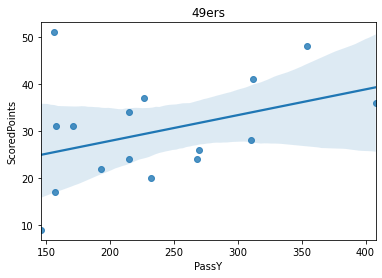

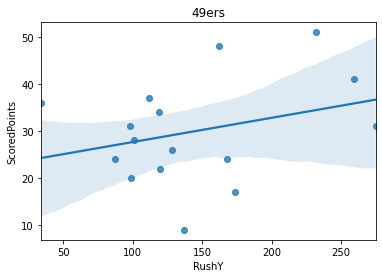

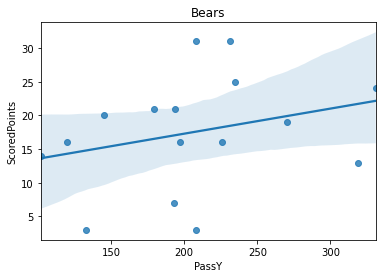

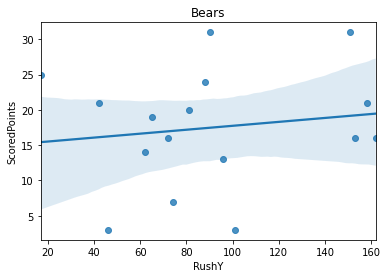

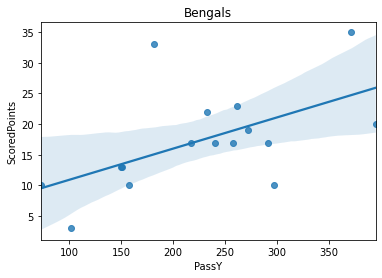

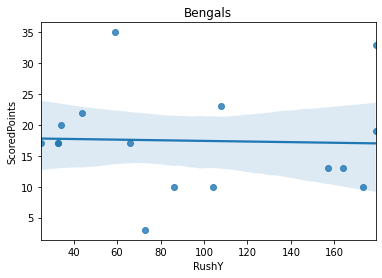

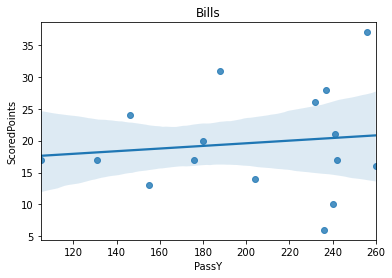

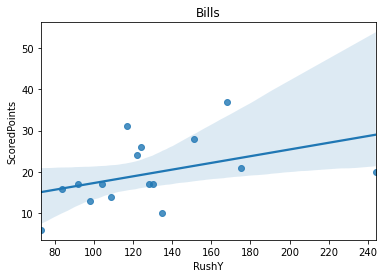

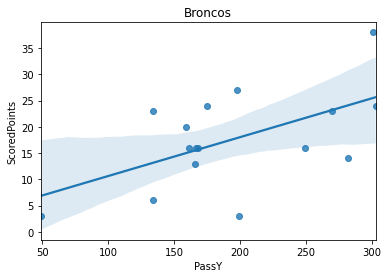

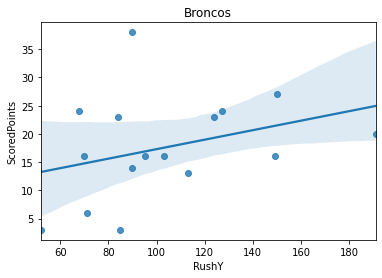

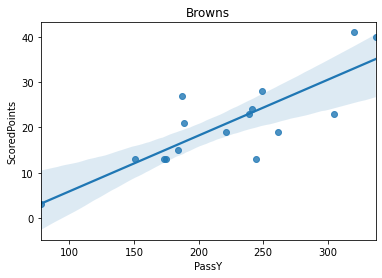

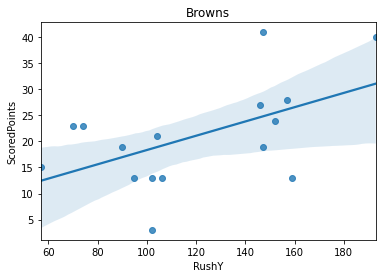

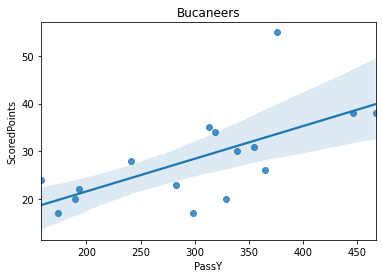

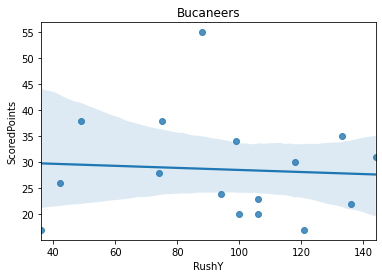

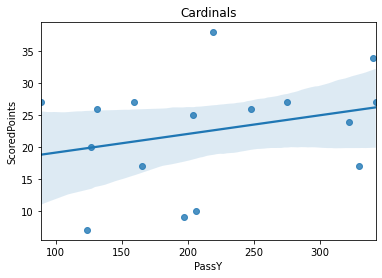

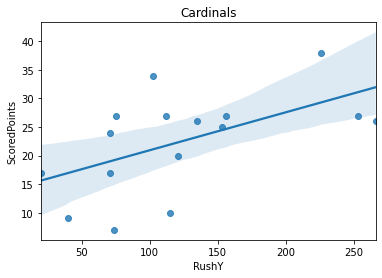

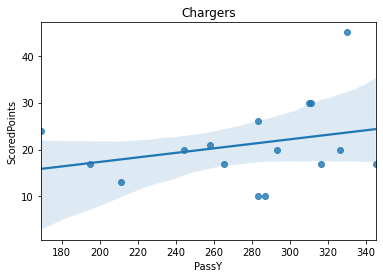

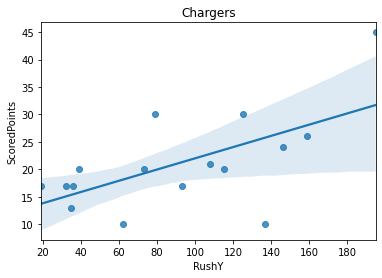

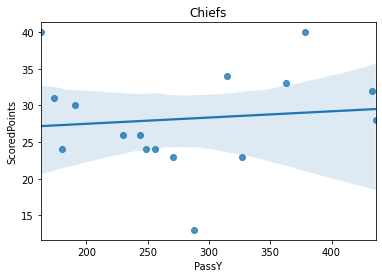

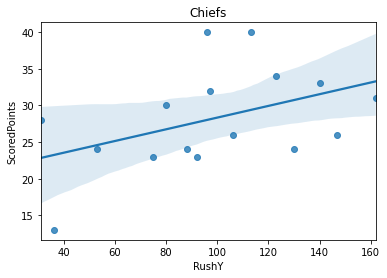

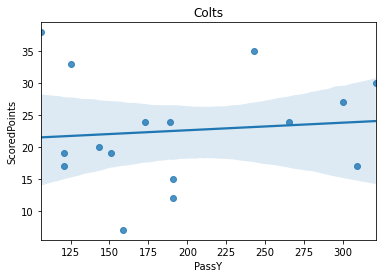

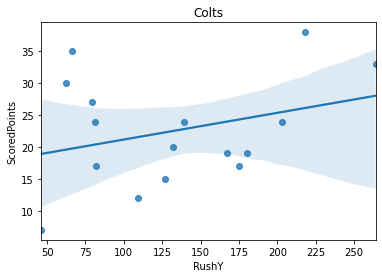

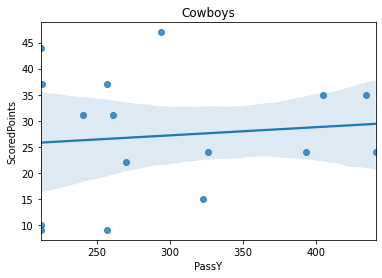

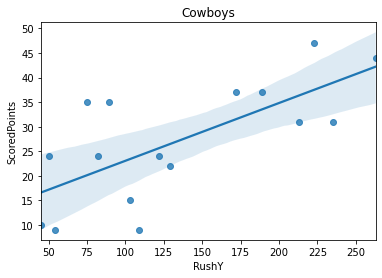

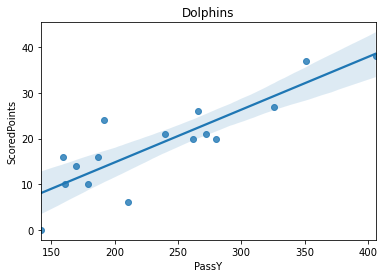

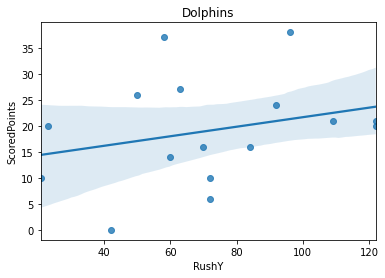

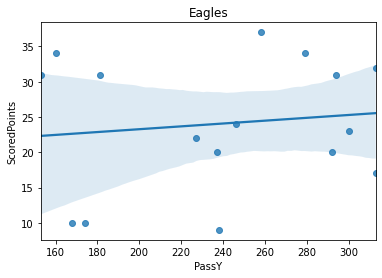

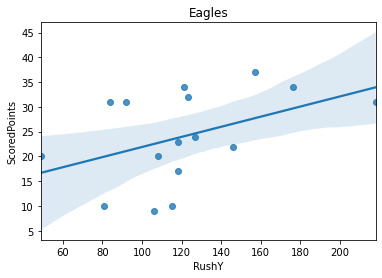

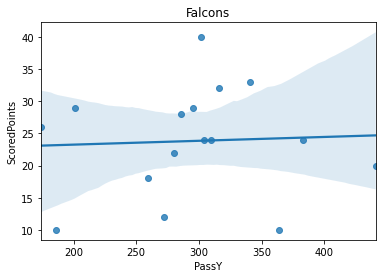

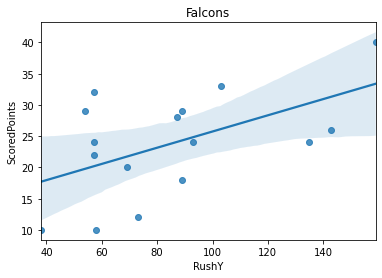

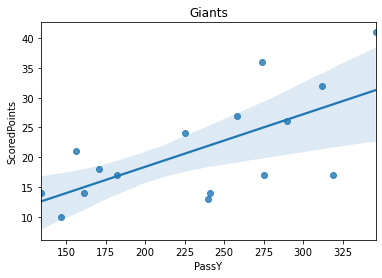

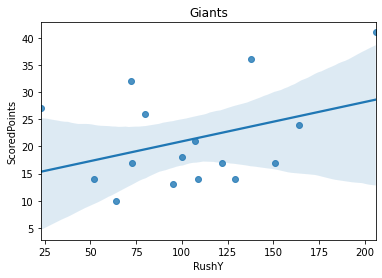

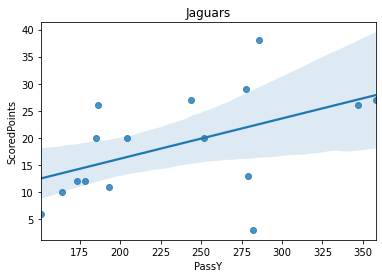

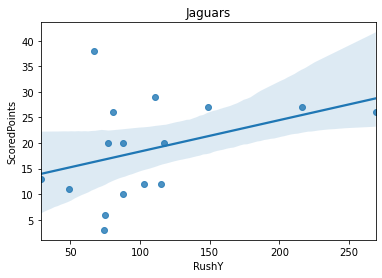

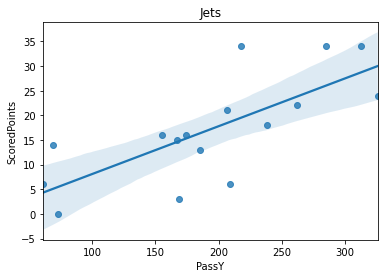

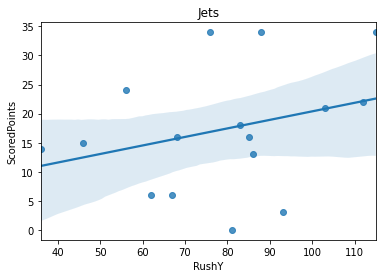

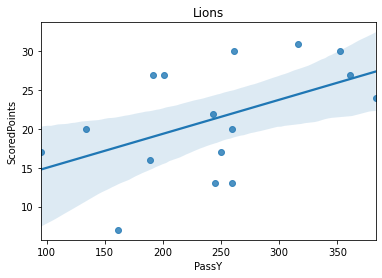

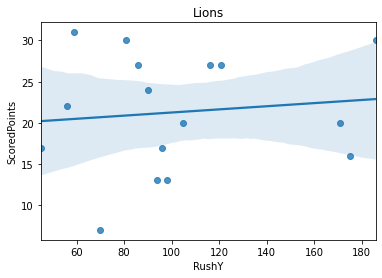

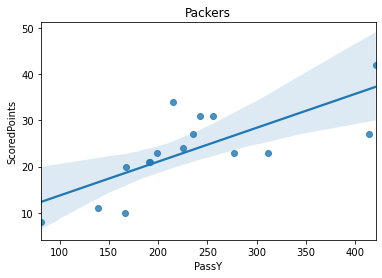

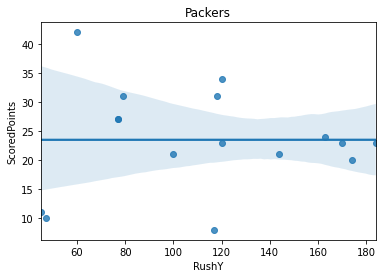

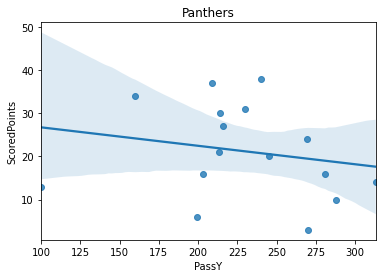

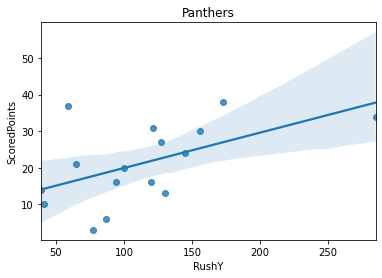

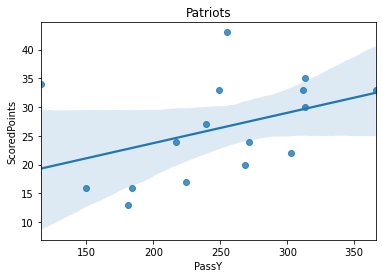

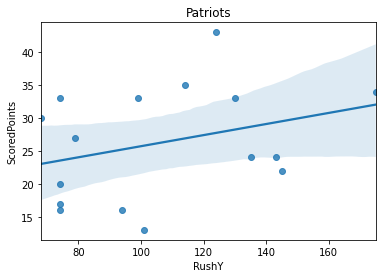

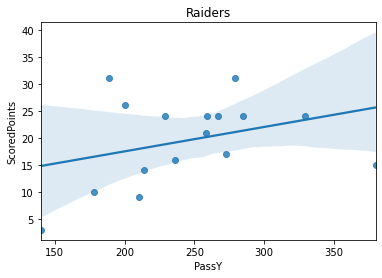

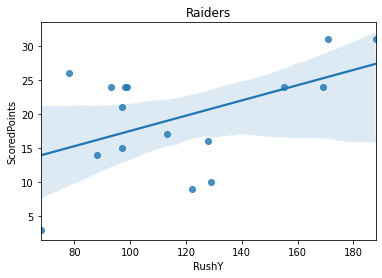

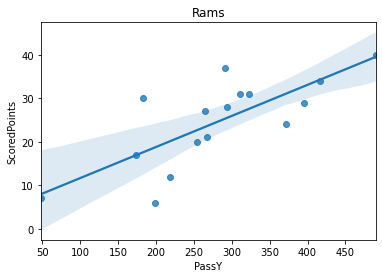

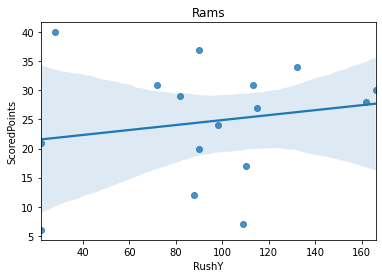

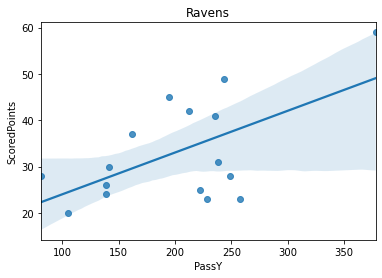

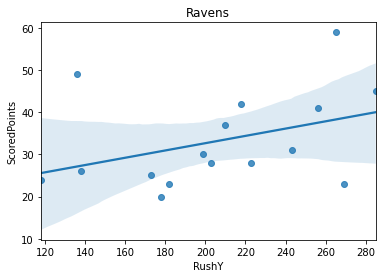

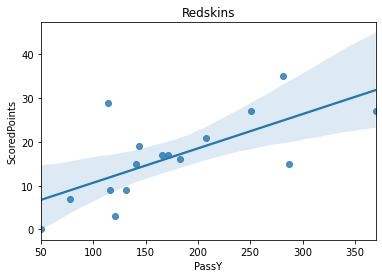

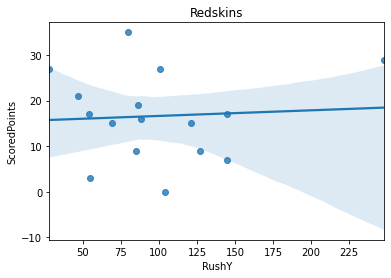

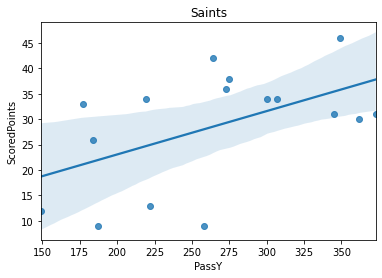

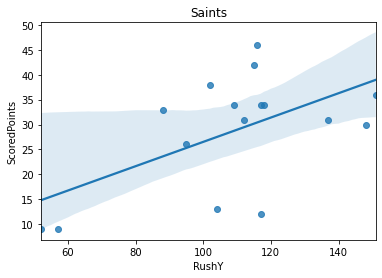

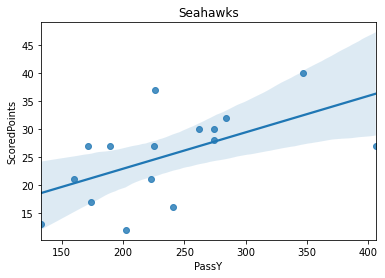

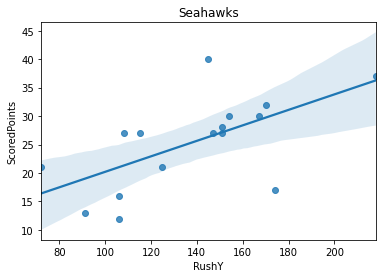

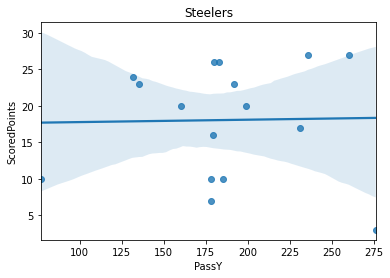

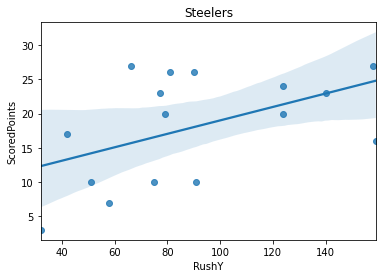

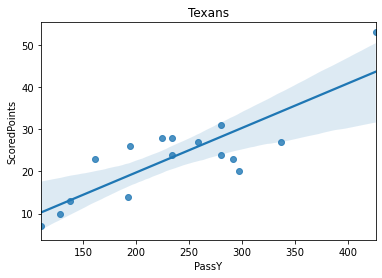

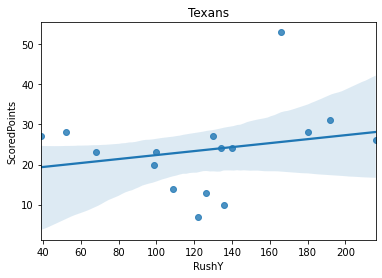

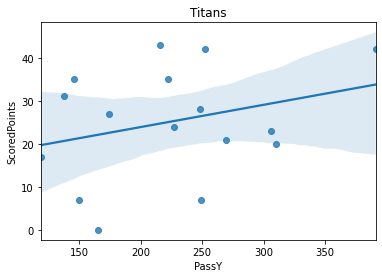

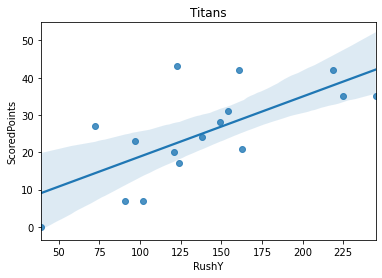

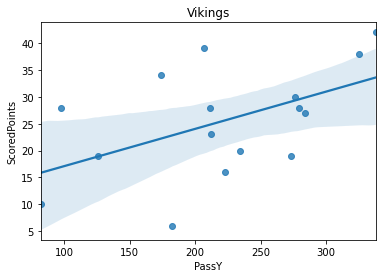

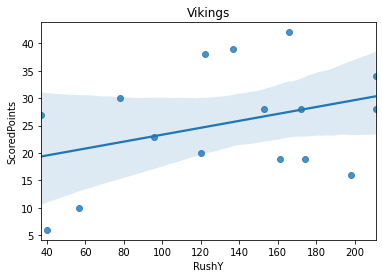

In [163]:
#Plotting variables that have high correlation to scoring
cnt = 1
for title, group in team_stats_init.groupby('Team Name'):
    plt.figure(cnt)
    sns.regplot(x= 'PassY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1
    plt.figure(cnt)
    sns.regplot(x= 'RushY', y= 'ScoredPoints', data= group)
    plt.title(title)
    cnt += 1





Text(0.5, 1.0, 'Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season')

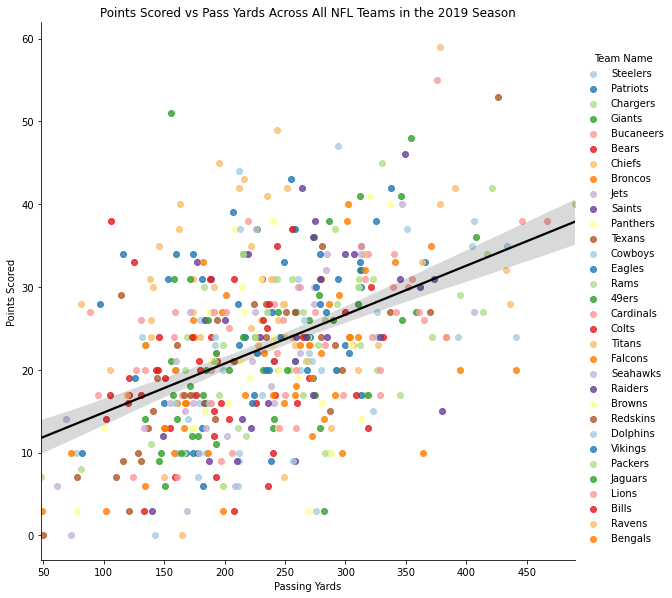

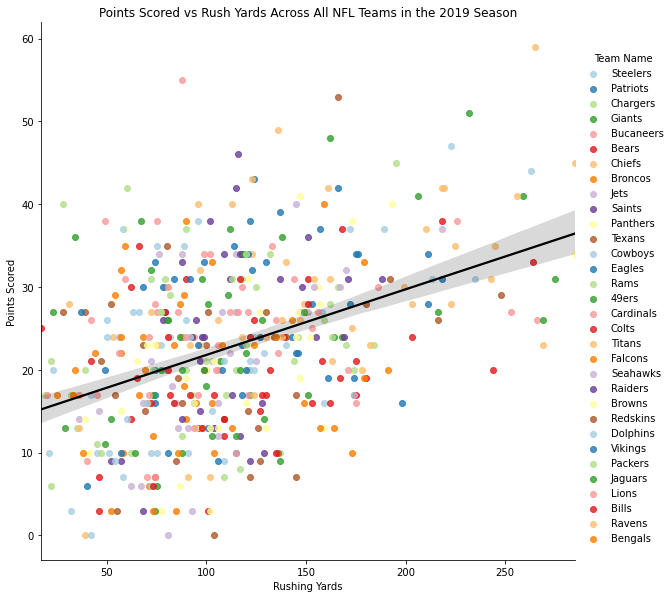

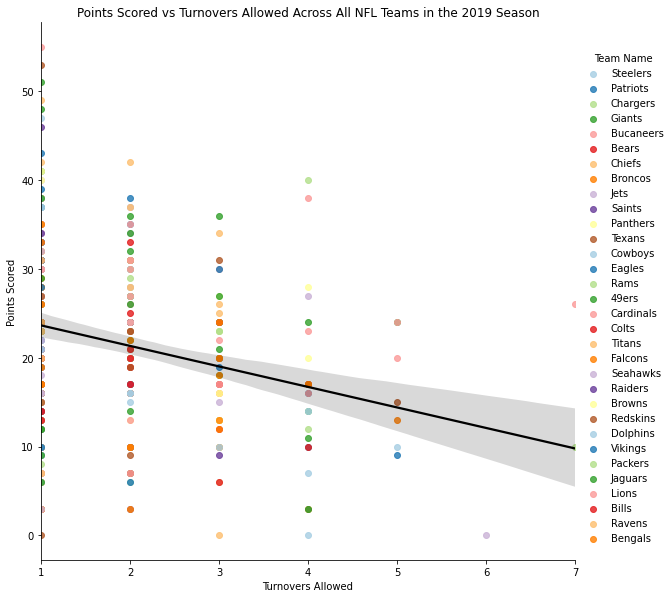

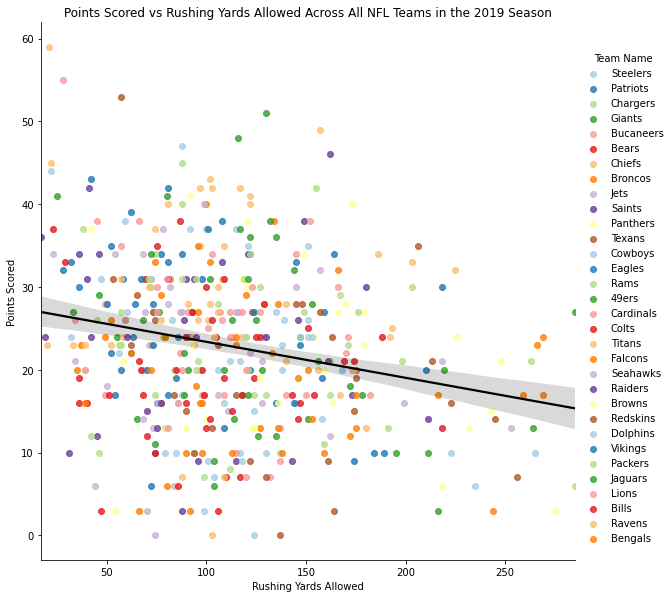

In [164]:
#Plotting combined statistics across all teams

Pass_Yards = sns.lmplot(x= 'PassY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="PassY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Pass_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Passing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Pass Yards Across All NFL Teams in the 2019 Season")

Rush_Yards = sns.lmplot(x= 'RushY', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushY", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rush_Yards.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rush Yards Across All NFL Teams in the 2019 Season")

Turnovers_Allowed = sns.lmplot(x= 'TurnoversAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="TurnoversAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Turnovers_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Turnovers Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Turnovers Allowed Across All NFL Teams in the 2019 Season")

Rushing_Yards_Allowed = sns.lmplot(x= 'RushingYardsAllowed', y= 'ScoredPoints', palette= sns.color_palette("Paired"), hue= 'Team Name',data= team_stats_init, height= 8, fit_reg= False)
sns.regplot(x="RushingYardsAllowed", y="ScoredPoints", data=team_stats_init, scatter=False, ax= Rushing_Yards_Allowed.axes[0, 0], line_kws={"color": "black"})
plt.xlabel("Rushing Yards Allowed")
plt.ylabel("Points Scored")
plt.title("Points Scored vs Rushing Yards Allowed Across All NFL Teams in the 2019 Season")
